In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
from sklearn.feature_selection import chi2, SelectKBest, f_classif
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier
from tqdm import tqdm

In [3]:
df = pd.read_csv('./Churn_Modelling.csv')

## Basic EDA

C:\Users\susil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


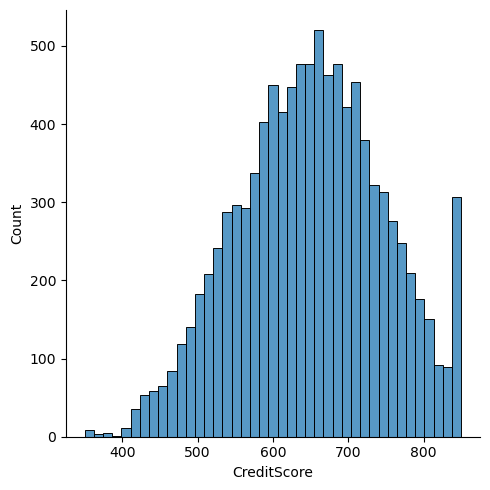

In [4]:
sns.displot(df['CreditScore'])

The majority credit score were between 600 to 750

In [5]:
df['Geography'].value_counts()

Geography
France     5014
Germany    2509
Spain      2477
Name: count, dtype: int64

<Axes: xlabel='Geography', ylabel='count'>

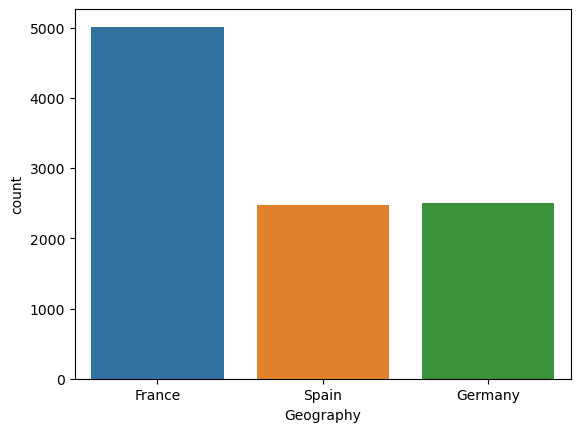

In [6]:
sns.countplot(data=df,x='Geography')

France has the majority customers

<Axes: xlabel='Gender', ylabel='count'>

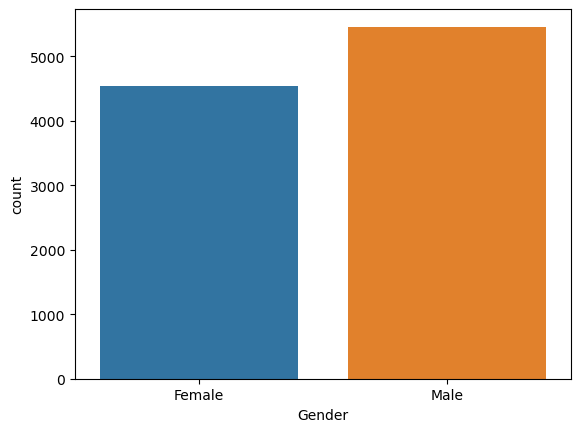

In [7]:
sns.countplot(data=df,x='Gender')

In [8]:
df['Gender'].value_counts()

Gender
Male      5457
Female    4543
Name: count, dtype: int64

In [9]:
5457 /( 5457 + 4543 ) * 100

54.56999999999999

The majority people were male which is by 55.5%

C:\Users\susil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


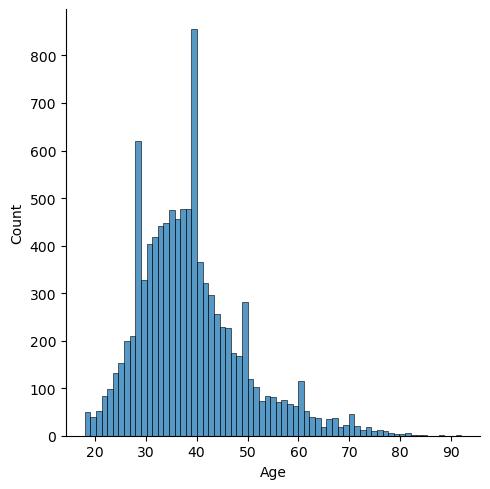

In [10]:
sns.displot(data=df,x='Age')

30 to 40 is the age range where majority people's age lies

<Axes: xlabel='Tenure', ylabel='count'>

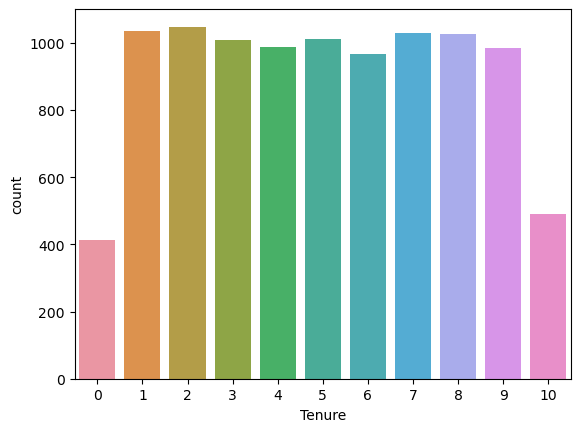

In [11]:
sns.countplot(data=df,x='Tenure')

([<matplotlib.patches.Wedge at 0x1fe50829610>,
 [Text(-0.6618432068009882, 0.8786145739807555, 'Having credit card'),
  Text(0.6618432068009881, -0.8786145739807556, 'Not having credit card')],
 [Text(-0.3610053855278117, 0.47924431308041204, '70.6%'),
  Text(0.36100538552781164, -0.4792443130804121, '29.4%')])

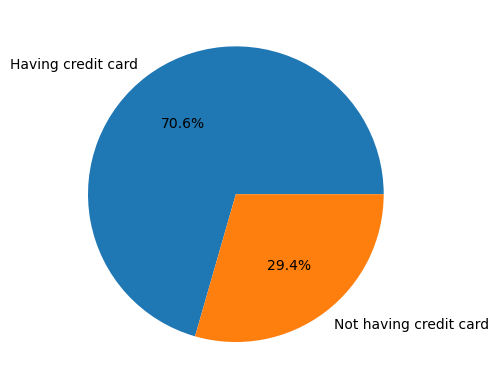

In [12]:
plt.pie(df['HasCrCard'].value_counts(),autopct='%.1f%%',labels=['Having credit card','Not having credit card'])

70% of the people has credit card

([<matplotlib.patches.Wedge at 0x1fe5186fd10>,
 [Text(-0.05216229267876963, 1.0987625290400536, 'Member'),
  Text(0.05216229267876925, -1.0987625290400536, 'Not a member')],
 [Text(-0.028452159642965248, 0.5993250158400292, '51.5%'),
  Text(0.02845215964296504, -0.5993250158400292, '48.5%')])

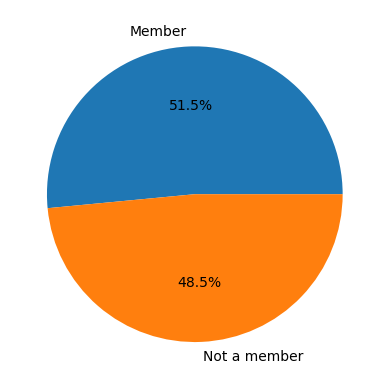

In [13]:
plt.pie(df['IsActiveMember'].value_counts(),autopct='%.1f%%',labels=['Member','Not a member'])

51% of the people were member of the bank

C:\Users\susil\AppData\Local\Temp\ipykernel_17568\2218174724.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['EstimatedSalary'])
C:\Users\susil\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='EstimatedSalary', ylabel='Density'>

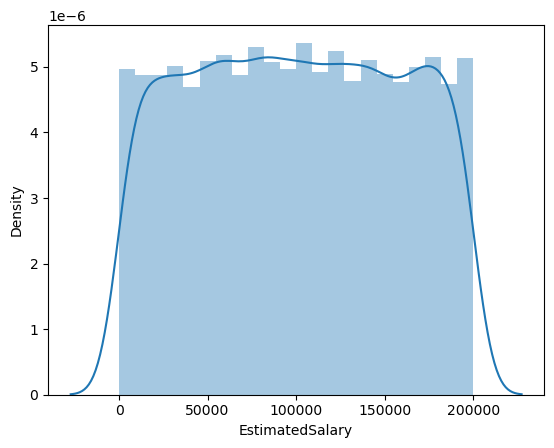

In [14]:
sns.distplot(df['EstimatedSalary'])

<Axes: xlabel='Exited', ylabel='count'>

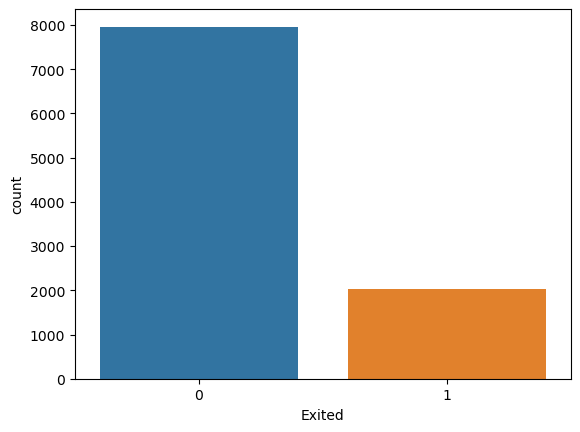

In [15]:
sns.countplot(data=df,x='Exited')

This is a biased dataset as nearly 8000 data is about not leaving and only about nearly 2300 values are for leaving

<Axes: xlabel='Geography', ylabel='count'>

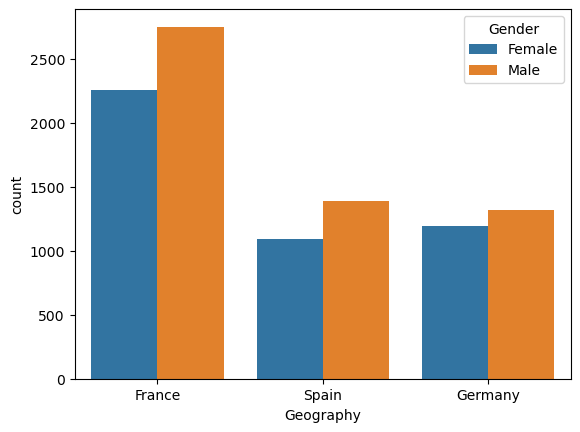

In [16]:
sns.countplot(data=df,x='Geography',hue='Gender')

In [17]:
df.groupby(['Gender', 'Geography']).size().groupby(level=0).apply(lambda x: 100 * x / x.sum()).unstack()

,Geography,France,Germany,Spain
Gender,Gender,,,
Female,Female,49.768875,26.260180,23.970944
Male,Male,50.448965,24.115815,25.435221


<Axes: xlabel='Age', ylabel='Balance'>

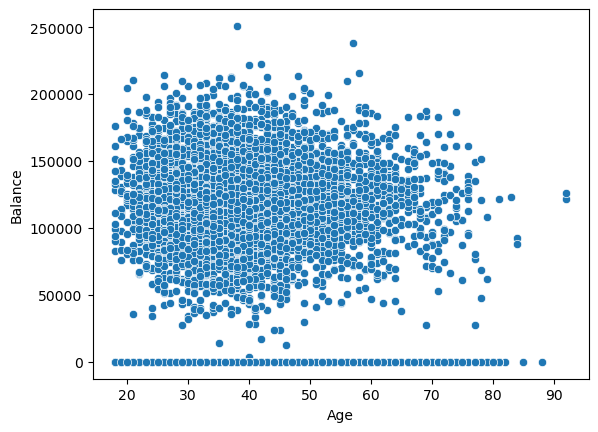

In [18]:
sns.scatterplot(data=df,x='Age',y='Balance')

## Data Preprocessing

In [19]:
df.isnull().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [20]:
df['Age'].dtype == 'int64'

True

In [21]:
df.duplicated().sum()

0

In [22]:
df_pr = df.copy()

In [23]:
df_pr.drop(columns=['RowNumber','CustomerId','Surname'],inplace=True)

In [24]:
columns = []
for cols in df_pr.columns:
    if df[cols].dtype == 'int64' or df[cols].dtype == 'float':
        columns.append(cols)

In [25]:
df_pr[columns].corr()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
CreditScore,1.000000,-0.003965,0.000842,0.006268,0.012238,-0.005458,0.025651,-0.001384,-0.027094
Age,-0.003965,1.000000,-0.009997,0.028308,-0.030680,-0.011721,0.085472,-0.007201,0.285323
Tenure,0.000842,-0.009997,1.000000,-0.012254,0.013444,0.022583,-0.028362,0.007784,-0.014001
Balance,0.006268,0.028308,-0.012254,1.000000,-0.304180,-0.014858,-0.010084,0.012797,0.118533
NumOfProducts,0.012238,-0.030680,0.013444,-0.304180,1.000000,0.003183,0.009612,0.014204,-0.047820
HasCrCard,-0.005458,-0.011721,0.022583,-0.014858,0.003183,1.000000,-0.011866,-0.009933,-0.007138
IsActiveMember,0.025651,0.085472,-0.028362,-0.010084,0.009612,-0.011866,1.000000,-0.011421,-0.156128
EstimatedSalary,-0.001384,-0.007201,0.007784,0.012797,0.014204,-0.009933,-0.011421,1.000000,0.012097
Exited,-0.027094,0.285323,-0.014001,0.118533,-0.047820,-0.007138,-0.156128,0.012097,1.000000


In [28]:
df_pr['Gender'] = le.fit_transform(df_pr['Gender'])

In [29]:
df_pr['Geography'] = le.fit_transform(df_pr['Geography'])

## Model Training

In [43]:
ft = SelectKBest(f_classif).fit(X,y)
scores = ft.scores_
for i in range(len(scores)):
    if (scores[i] > 100):
        print(f"score: {scores[i]} ---> {X.columns[i]}")

score: 114.72798919929261 ---> Gender
score: 886.0632749091019 ---> Age
score: 142.47383249967638 ---> Balance
score: 249.80079439267553 ---> IsActiveMember


In [97]:
X = df_pr[["Gender","Age","Balance","IsActiveMember"]]
y = df_pr.iloc[:,-1]

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [99]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [100]:
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [109]:
algo = {
    "logistic regression":LogisticRegression(max_iter=1000),
    "DecisionTreeClassifier":DecisionTreeClassifier(),
    "RandomForestClassifier":RandomForestClassifier(),
    "SupportVectorMachine":SVC(),
    "AdaBoostClassifier":AdaBoostClassifier()
}

In [110]:
predicted_scores = {}
for key,alg in tqdm(algo.items()):
    alg.fit(X_train_scaled,y_train)
    y_pred = alg.predict(X_train_scaled)
    train_score = accuracy_score(y_train,y_pred)
    y_pred = alg.predict(X_test_scaled)
    test_score = accuracy_score(y_test,y_pred)
    predicted_scores[key] = {
        "train score":train_score,
        "test score":test_score
    }
    #predicted_scores['algo'] = key
    #predicted_scores['train'] = train_score
    #predicted_scores['test'] = test_score
    print(f"{key} completed")

  0%|                                                                                            | 0/5 [00:00<?, ?it/s]

logistic regression completed
DecisionTreeClassifier completed


 60%|██████████████████████████████████████████████████▍                                 | 3/5 [00:00<00:00,  3.70it/s]

RandomForestClassifier completed


 80%|███████████████████████████████████████████████████████████████████▏                | 4/5 [00:04<00:01,  1.40s/it]

SupportVectorMachine completed


100%|████████████████████████████████████████████████████████████████████████████████████| 5/5 [00:04<00:00,  1.02it/s]

AdaBoostClassifier completed


In [111]:
for algo in predicted_scores.items():
    name,scores = algo
    train = scores['train score']
    test = scores['test score']
    print(f"{name}:\ntrain: {train}\ntest: {test}\n\n")

logistic regression:
train: 0.801044776119403
test: 0.8148484848484848


DecisionTreeClassifier:
train: 0.9594029850746268
test: 0.7715151515151515


RandomForestClassifier:
train: 0.9592537313432836
test: 0.7990909090909091


SupportVectorMachine:
train: 0.8294029850746268
test: 0.8390909090909091


AdaBoostClassifier:
train: 0.8277611940298507
test: 0.8427272727272728




We could go for adaboost or svc these two neither under fit or overfit